<a href="https://colab.research.google.com/github/randiijulian/Pengembangan-Machine-Learning-Dicoding/blob/main/NLP_Model_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Randi Julian Saputra

Github : github.com/randiijulian

Dataset : kaggle.com/datasets/onpilot/indonesian-tweets-covid19-handling-2020

## Project Submission 1 Dicoding Pengembangan ML
NLP Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install Needed Library

In [ ]:
#Import Library
import pandas as pd #Pandas to process dataset
from sklearn.model_selection import train_test_split #split dataset into training and validation  
from tensorflow.keras.preprocessing.text import Tokenizer #make tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #make sequences
import tensorflow as tf #tensorflow

In [ ]:
#install kaggle
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
#input file ke colab
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"randijuliansaputra","key":"2f7e1d60b96672fa5ed4a4967c3cc72a"}'}

In [ ]:
#.json untuk API kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#download dataset menggunakan link kaggle
!kaggle datasets download -d onpilot/indonesian-tweets-covid19-handling-2020
!ls

100% 621k/621k [00:00<00:00, 799kB/s]
100% 621k/621k [00:00<00:00, 799kB/s]
drive  indonesian-tweets-covid19-handling-2020.zip  kaggle.json  sample_data


In [ ]:
# Unzip file dataset
import zipfile
local_zip = '/content/indonesian-tweets-covid19-handling-2020.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#read dataset
home_data = pd.read_excel('/content/prastyo_sentiment_covid-general_aspect.xlsx')
home_data.head()

,text,sentiment,Unnamed: 2,Total Data,=,2269
0,Yuppp Karena UTANG Pemerintah jg UTANG Bangsa ...,Negative,NaN,Positif,=,874.0
1,Yuks.. kawal kebijakan pemerintah jangan sampa...,Positive,NaN,Negative,=,1044.0
2,Yukk sama-sama bahu membahu membantuu pemerint...,Positive,NaN,Neutral,=,351.0
3,Yuk sahabat kita samasama menjaga jarak antar ...,Positive,NaN,NaN,NaN,NaN
4,Yuk sahabat kita sama sama menjaga jarak antar...,Positive,NaN,NaN,NaN,NaN


In [ ]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269 entries, 0 to 2268
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        2269 non-null   object 
 1   sentiment   2269 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Total Data  3 non-null      object 
 4   =           3 non-null      object 
 5   2269        3 non-null      float64
dtypes: float64(2), object(4)
memory usage: 106.5+ KB


In [ ]:
# Deskripsi
home_data.describe()

,Unnamed: 2,2269
count,0.0,3.000000
mean,NaN,756.333333
std,NaN,361.173550
min,NaN,351.000000
25%,NaN,612.500000
50%,NaN,874.000000
75%,NaN,959.000000
max,NaN,1044.000000


#Exploratory Data Analysis - Menangani Missing Value dan Outliers

In [ ]:
home_data = home_data.drop(['Total Data', 'Unnamed: 2', '=', 2269],axis=1)

In [ ]:
home_data

,text,sentiment
0,Yuppp Karena UTANG Pemerintah jg UTANG Bangsa ...,Negative
1,Yuks.. kawal kebijakan pemerintah jangan sampa...,Positive
2,Yukk sama-sama bahu membahu membantuu pemerint...,Positive
3,Yuk sahabat kita samasama menjaga jarak antar ...,Positive
4,Yuk sahabat kita sama sama menjaga jarak antar...,Positive
...,...,...
2264,Semoga KTT luar biasa memberikan manfaat bg In...,Neutral
2265,"1. Corona sudah menyerang di berbagai negara, ...",Negative
2266,Sudah sampai kabupaten sebelah kawan...\nMari ...,Positive
2267,Berharap pemerintah Indonesia segara menutup p...,Neutral


In [ ]:
# #drop category and split category
# kategori_berita = pd.get_dummies(home_data.category)
# dataset_baru = pd.concat([home_data, kategori_berita], axis=1)
# dataset_baru = dataset_baru.drop(columns='category')
# dataset_baru

In [ ]:
sentiment = pd.get_dummies(home_data.sentiment)
sentiment

,Negative,Neutral,Positive
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2264,0,1,0
2265,1,0,0
2266,0,0,1
2267,0,1,0


In [ ]:
new_data = pd.concat([home_data, sentiment], axis=1)
new_data = new_data.drop(columns='sentiment')
new_data

,text,Negative,Neutral,Positive
0,Yuppp Karena UTANG Pemerintah jg UTANG Bangsa ...,1,0,0
1,Yuks.. kawal kebijakan pemerintah jangan sampa...,0,0,1
2,Yukk sama-sama bahu membahu membantuu pemerint...,0,0,1
3,Yuk sahabat kita samasama menjaga jarak antar ...,0,0,1
4,Yuk sahabat kita sama sama menjaga jarak antar...,0,0,1
...,...,...,...,...
2264,Semoga KTT luar biasa memberikan manfaat bg In...,0,1,0
2265,"1. Corona sudah menyerang di berbagai negara, ...",1,0,0
2266,Sudah sampai kabupaten sebelah kawan...\nMari ...,0,0,1
2267,Berharap pemerintah Indonesia segara menutup p...,0,1,0


In [ ]:
#preparing text and label
text = new_data['text'].values
label = new_data[['Negative', 'Neutral', 'Positive']].values

In [ ]:
#Divide the dataset into train and validation
train_text, test_text, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [ ]:
import numpy as np
label_train=np.array(label_train)
label_test=np.array(label_test)

In [ ]:
#create tokenizer and padding
tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(train_text)
word_index = tokenizer.word_index
sekuens_train = tokenizer.texts_to_sequences(train_text)
sekuens_test = tokenizer.texts_to_sequences(test_text)
padded_train = pad_sequences(sekuens_train) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
#Callback to avoid overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi telah lebih dari 90%!")
      self.model.stop_training = Truecla
callbacks = myCallback()

In [ ]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #total layer/class pada label
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
plot_model = model.fit(
    padded_train, 
    label_train, 
    epochs=30, #total epoch 
    validation_data=(padded_test, label_test), 
    verbose=2, 
    callbacks=[callbacks]
    )

Epoch 1/30
57/57 - 12s - loss: 0.6167 - accuracy: 0.4463 - val_loss: 0.5978 - val_accuracy: 0.4670 - 12s/epoch - 205ms/step
Epoch 2/30
57/57 - 1s - loss: 0.5686 - accuracy: 0.4815 - val_loss: 0.5740 - val_accuracy: 0.5551 - 761ms/epoch - 13ms/step
Epoch 3/30
57/57 - 1s - loss: 0.3776 - accuracy: 0.7504 - val_loss: 0.5398 - val_accuracy: 0.6410 - 724ms/epoch - 13ms/step
Epoch 4/30
57/57 - 1s - loss: 0.2128 - accuracy: 0.8656 - val_loss: 0.5740 - val_accuracy: 0.6828 - 846ms/epoch - 15ms/step
Epoch 5/30
57/57 - 1s - loss: 0.1048 - accuracy: 0.9438 - val_loss: 0.7199 - val_accuracy: 0.6982 - 871ms/epoch - 15ms/step
Epoch 6/30
57/57 - 0s - loss: 0.0650 - accuracy: 0.9658 - val_loss: 0.8192 - val_accuracy: 0.6784 - 454ms/epoch - 8ms/step
Epoch 7/30
57/57 - 0s - loss: 0.0546 - accuracy: 0.9702 - val_loss: 0.8760 - val_accuracy: 0.6718 - 452ms/epoch - 8ms/step
Epoch 8/30
57/57 - 0s - loss: 0.0302 - accuracy: 0.9868 - val_loss: 0.9760 - val_accuracy: 0.6916 - 446ms/epoch - 8ms/step
Epoch 9/30


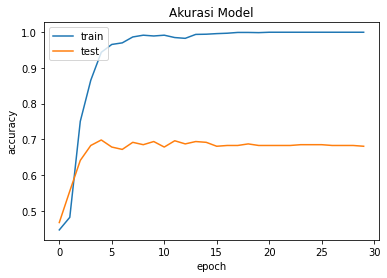

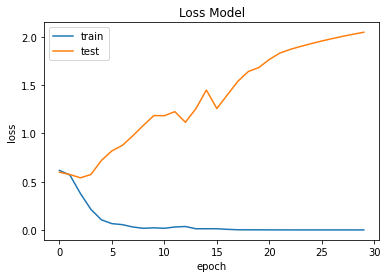

In [ ]:
import matplotlib.pyplot as plt
#Accuracy  
plt.plot(plot_model.history['accuracy'])
plt.plot(plot_model.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Loss
plt.plot(plot_model.history['loss'])
plt.plot(plot_model.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()